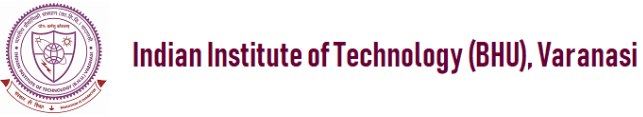
<h1><center><span style="color:green">Internal Return Fines Generation Prediction </span> </center></h1>

# Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
import warnings

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Import the data

In [2]:
df=pd.read_csv("D:/JSW/validation/irf data latest.csv")

# Extraploratory Data Analysis

In [3]:
# lst = [0,2,4,14,18,20,24]
# log = []
# for j in range(0,40,1):
#     x_TI = df.iloc[:,lst].values
#     y_TI = df.iloc[:,35].values
       
#     x_TI_train, x_TI_test, y_TI_train, y_TI_test = train_test_split(x_TI, y_TI, test_size=0.1, shuffle = True, random_state = j)
#     reg = ExtraTreesRegressor()
#     reg.fit(x_TI_train, y_TI_train)
#     pred_TI = reg.predict(x_TI_test)
#     rr = r2_score(y_TI_test, pred_TI)
#     print(rr,  j)
#     log.append(rr)

In [4]:
df.shape

(1411, 38)

In [5]:
df.head()

,"Fe, %","FeO, %","SiO2, %","Al2O3, %","CaO, %","MgO, %","MnO, %","C, %","S, %","P, %",CaO/SiO2,Al2O3/SiO2,(CaO+MgO)/SiO2,"Cumu.+10mm,%","Mean size,mm","TI(+6.3mm), %","-100#, %",MPS (Raw mix) before moisture addition,LOI %,MOI%,Avg. machine speed,Avg. furnace temp.,WG fan speed (RPM),ESP inlet temp.,Avg. moisture at 2007 C,"Sinter M/C bed height,mm",Al2O3 (Iron ore fines),SiO2(Iron ore fines),WB16B temp.,"Productivity,t/m2/d",Net Productivity,Limestone (-3.15 mm),Dolomite (-3.15 mm),Coke particle (-3.15 mm),Cooler temp.deg C,BFRF Genaration,IRF Genartion,Total return fines Generation(IRF & BFRF)
0,54.58,9.00,5.49,3.96,10.87,2.10,0.18,0.02,0.01,0.05,1.98,0.72,2.37,66.66,17.35,75.56,37.28,2.79,3.21,4.71,2.18,1230.59,866.88,148.97,6.67,682.16,4.28,5.38,354.22,36.67,29.71,96.70,97.55,93.19,129.04,18.97,14.34,33.31
1,54.59,10.31,5.41,3.79,11.22,2.20,0.11,0.02,0.01,0.05,2.08,0.70,2.49,66.44,17.41,76.23,34.72,3.17,3.12,3.78,2.12,1228.04,889.32,138.66,6.44,678.33,4.13,5.37,317.92,37.62,30.55,97.91,97.08,96.82,167.71,18.78,14.43,33.21
2,55.10,9.57,5.14,4.12,10.30,2.18,0.19,0.02,0.01,0.05,2.00,0.80,2.43,66.44,17.55,75.45,31.54,3.83,3.26,3.97,2.01,1236.01,888.28,138.58,6.48,671.45,4.46,4.38,298.59,35.10,28.53,97.26,97.94,96.29,131.36,18.71,15.17,33.88
3,55.07,9.84,5.19,3.74,10.65,2.19,0.11,0.02,0.01,0.05,2.05,0.72,2.47,65.69,17.37,76.18,33.67,3.24,3.63,4.35,2.08,1231.97,890.00,142.25,6.59,670.79,4.34,4.05,304.53,35.71,28.75,97.66,97.52,95.27,143.89,19.50,15.57,35.07
4,53.56,10.15,5.83,4.78,11.19,2.23,0.12,0.02,0.01,0.05,1.92,0.82,2.30,65.85,17.81,75.77,35.79,3.25,3.34,4.14,2.23,1225.16,885.82,143.92,6.74,677.09,5.00,6.29,326.95,37.00,30.06,98.13,97.62,96.43,155.08,18.77,15.20,33.97


In [6]:
df.describe()

,"Fe, %","FeO, %","SiO2, %","Al2O3, %","CaO, %","MgO, %","MnO, %","C, %","S, %","P, %",CaO/SiO2,Al2O3/SiO2,(CaO+MgO)/SiO2,"Cumu.+10mm,%","Mean size,mm","TI(+6.3mm), %","-100#, %",MPS (Raw mix) before moisture addition,LOI %,MOI%,Avg. machine speed,Avg. furnace temp.,WG fan speed (RPM),ESP inlet temp.,Avg. moisture at 2007 C,"Sinter M/C bed height,mm",Al2O3 (Iron ore fines),SiO2(Iron ore fines),WB16B temp.,"Productivity,t/m2/d",Net Productivity,Limestone (-3.15 mm),Dolomite (-3.15 mm),Coke particle (-3.15 mm),Cooler temp.deg C,BFRF Genaration,IRF Genartion,Total return fines Generation(IRF & BFRF)
count,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.00000,1411.00000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000
mean,53.546081,9.660957,5.736478,3.454507,12.233870,2.195925,0.508512,0.020893,0.014444,0.064706,2.139887,0.606669,2.524075,61.802006,16.327378,76.541169,33.375549,2.779334,4.715854,6.202346,2.258391,1213.962325,923.206357,135.102580,7.256690,674.258030,3.355762,5.197052,355.826329,36.91995,30.02983,92.317690,91.253459,91.307378,161.802679,18.642155,15.648405,34.290524
std,0.775926,0.342345,0.408278,0.298898,0.934387,0.108923,0.198221,0.004132,0.005550,0.015204,0.165062,0.077449,0.184996,1.737133,0.529921,1.447672,6.216611,0.315583,1.607713,1.014249,0.123050,28.951859,35.975218,11.400055,0.719895,21.684091,0.487861,0.735180,36.761446,2.12179,1.69438,2.392149,2.482992,2.618285,37.609043,1.282452,1.982649,2.344925
min,51.510000,8.350000,4.470000,2.680000,10.080000,1.700000,0.050000,0.010000,0.010000,0.030000,1.740000,0.470000,2.060000,55.690000,14.570000,70.220000,17.920000,2.010000,2.100000,3.610000,1.590000,888.140000,700.730000,92.440000,2.000000,495.250000,2.510000,3.070000,205.970000,21.31000,18.51000,82.820000,78.160000,67.980000,0.000000,12.450000,11.020000,29.140000
25%,52.980000,9.420000,5.420000,3.240000,11.630000,2.120000,0.370000,0.020000,0.010000,0.050000,2.030000,0.540000,2.400000,60.720000,15.990000,75.490000,28.230000,2.550000,3.530000,5.420000,2.220000,1201.720000,902.425000,125.485000,6.810000,666.780000,2.925000,4.760000,327.680000,36.37000,29.38000,90.735000,89.730000,90.125000,133.325000,18.030000,14.240000,32.705000
50%,53.330000,9.640000,5.730000,3.390000,12.540000,2.200000,0.500000,0.020000,0.010000,0.060000,2.110000,0.600000,2.490000,61.600000,16.280000,76.500000,34.950000,2.760000,4.030000,6.310000,2.290000,1214.710000,932.010000,138.520000,7.270000,675.820000,3.300000,5.220000,358.740000,37.37000,30.30000,92.140000,90.870000,91.600000,161.370000,18.480000,15.480000,33.880000
75%,54.040000,9.870000,6.070000,3.630000,12.920000,2.270000,0.640000,0.020000,0.020000,0.080000,2.230000,0.660000,2.630000,62.660000,16.600000,77.670000,38.170000,3.000000,6.380000,6.980000,2.340000,1230.650000,949.985000,143.480000,7.630000,683.985000,3.710000,5.620000,385.405000,38.19500,31.04500,93.810000,92.390000,92.930000,190.540000,19.000000,17.020000,35.720000
max,56.300000,11.080000,6.810000,4.780000,14.340000,2.610000,1.100000,0.090000,0.070000,0.180000,2.890000,0.880000,3.330000,67.690000,18.220000,80.640000,48.310000,3.900000,8.620000,9.240000,2.490000,1271.370000,960.020000,164.180000,12.950000,791.160000,5.420000,8.750000,433.930000,40.94000,33.84000,98.770000,98.330000,97.680000,277.050000,22.500000,22.870000,41.950000


In [7]:
df.describe()

,"Fe, %","FeO, %","SiO2, %","Al2O3, %","CaO, %","MgO, %","MnO, %","C, %","S, %","P, %",CaO/SiO2,Al2O3/SiO2,(CaO+MgO)/SiO2,"Cumu.+10mm,%","Mean size,mm","TI(+6.3mm), %","-100#, %",MPS (Raw mix) before moisture addition,LOI %,MOI%,Avg. machine speed,Avg. furnace temp.,WG fan speed (RPM),ESP inlet temp.,Avg. moisture at 2007 C,"Sinter M/C bed height,mm",Al2O3 (Iron ore fines),SiO2(Iron ore fines),WB16B temp.,"Productivity,t/m2/d",Net Productivity,Limestone (-3.15 mm),Dolomite (-3.15 mm),Coke particle (-3.15 mm),Cooler temp.deg C,BFRF Genaration,IRF Genartion,Total return fines Generation(IRF & BFRF)
count,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.00000,1411.00000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000
mean,53.546081,9.660957,5.736478,3.454507,12.233870,2.195925,0.508512,0.020893,0.014444,0.064706,2.139887,0.606669,2.524075,61.802006,16.327378,76.541169,33.375549,2.779334,4.715854,6.202346,2.258391,1213.962325,923.206357,135.102580,7.256690,674.258030,3.355762,5.197052,355.826329,36.91995,30.02983,92.317690,91.253459,91.307378,161.802679,18.642155,15.648405,34.290524
std,0.775926,0.342345,0.408278,0.298898,0.934387,0.108923,0.198221,0.004132,0.005550,0.015204,0.165062,0.077449,0.184996,1.737133,0.529921,1.447672,6.216611,0.315583,1.607713,1.014249,0.123050,28.951859,35.975218,11.400055,0.719895,21.684091,0.487861,0.735180,36.761446,2.12179,1.69438,2.392149,2.482992,2.618285,37.609043,1.282452,1.982649,2.344925
min,51.510000,8.350000,4.470000,2.680000,10.080000,1.700000,0.050000,0.010000,0.010000,0.030000,1.740000,0.470000,2.060000,55.690000,14.570000,70.220000,17.920000,2.010000,2.100000,3.610000,1.590000,888.140000,700.730000,92.440000,2.000000,495.250000,2.510000,3.070000,205.970000,21.31000,18.51000,82.820000,78.160000,67.980000,0.000000,12.450000,11.020000,29.140000
25%,52.980000,9.420000,5.420000,3.240000,11.630000,2.120000,0.370000,0.020000,0.010000,0.050000,2.030000,0.540000,2.400000,60.720000,15.990000,75.490000,28.230000,2.550000,3.530000,5.420000,2.220000,1201.720000,902.425000,125.485000,6.810000,666.780000,2.925000,4.760000,327.680000,36.37000,29.38000,90.735000,89.730000,90.125000,133.325000,18.030000,14.240000,32.705000
50%,53.330000,9.640000,5.730000,3.390000,12.540000,2.200000,0.500000,0.020000,0.010000,0.060000,2.110000,0.600000,2.490000,61.600000,16.280000,76.500000,34.950000,2.760000,4.030000,6.310000,2.290000,1214.710000,932.010000,138.520000,7.270000,675.820000,3.300000,5.220000,358.740000,37.37000,30.30000,92.140000,90.870000,91.600000,161.370000,18.480000,15.480000,33.880000
75%,54.040000,9.870000,6.070000,3.630000,12.920000,2.270000,0.640000,0.020000,0.020000,0.080000,2.230000,0.660000,2.630000,62.660000,16.600000,77.670000,38.170000,3.000000,6.380000,6.980000,2.340000,1230.650000,949.985000,143.480000,7.630000,683.985000,3.710000,5.620000,385.405000,38.19500,31.04500,93.810000,92.390000,92.930000,190.540000,19.000000,17.020000,35.720000
max,56.300000,11.080000,6.810000,4.780000,14.340000,2.610000,1.100000,0.090000,0.070000,0.180000,2.890000,0.880000,3.330000,67.690000,18.220000,80.640000,48.310000,3.900000,8.620000,9.240000,2.490000,1271.370000,960.020000,164.180000,12.950000,791.160000,5.420000,8.750000,433.930000,40.94000,33.84000,98.770000,98.330000,97.680000,277.050000,22.500000,22.870000,41.950000


In [8]:
df.columns

Index(['Fe, %', 'FeO, %', 'SiO2, %', 'Al2O3, %', 'CaO, %', 'MgO, %', 'MnO, %',
       'C, %', 'S, %', 'P, %', 'CaO/SiO2', 'Al2O3/SiO2', '(CaO+MgO)/SiO2',
       'Cumu.+10mm,%', 'Mean size,mm', 'TI(+6.3mm), %', '-100#, %',
       'MPS (Raw mix) before moisture addition', 'LOI %', 'MOI%',
       'Avg. machine speed', 'Avg. furnace temp.', 'WG fan speed (RPM)',
       'ESP inlet temp.', 'Avg. moisture at 2007 C',
       'Sinter M/C bed height,mm', 'Al2O3 (Iron ore fines)',
       'SiO2(Iron ore fines)', 'WB16B temp.', 'Productivity,t/m2/d',
       'Net Productivity', 'Limestone (-3.15 mm)', 'Dolomite (-3.15 mm)',
       'Coke particle (-3.15 mm)', 'Cooler temp.deg C', 'BFRF Genaration',
       'IRF Genartion', 'Total return fines Generation(IRF & BFRF) '],
      dtype='object')

In [9]:
df.drop(['Mean size,mm', 'TI(+6.3mm), %','Total return fines Generation(IRF & BFRF) ','Productivity,t/m2/d','BFRF Genaration',
       'Net Productivity','Limestone (-3.15 mm)', 'Dolomite (-3.15 mm)'],axis=1,inplace=True)

In [10]:
df.isnull().sum()

Fe, %                                     0
FeO, %                                    0
SiO2, %                                   0
Al2O3, %                                  0
CaO, %                                    0
MgO, %                                    0
MnO, %                                    0
C, %                                      0
S, %                                      0
P, %                                      0
CaO/SiO2                                  0
Al2O3/SiO2                                0
(CaO+MgO)/SiO2                            0
Cumu.+10mm,%                              0
-100#, %                                  0
MPS (Raw mix) before moisture addition    0
LOI %                                     0
MOI%                                      0
Avg. machine speed                        0
Avg. furnace temp.                        0
WG fan speed (RPM)                        0
ESP inlet temp.                           0
Avg. moisture at 2007 C         

<AxesSubplot:>

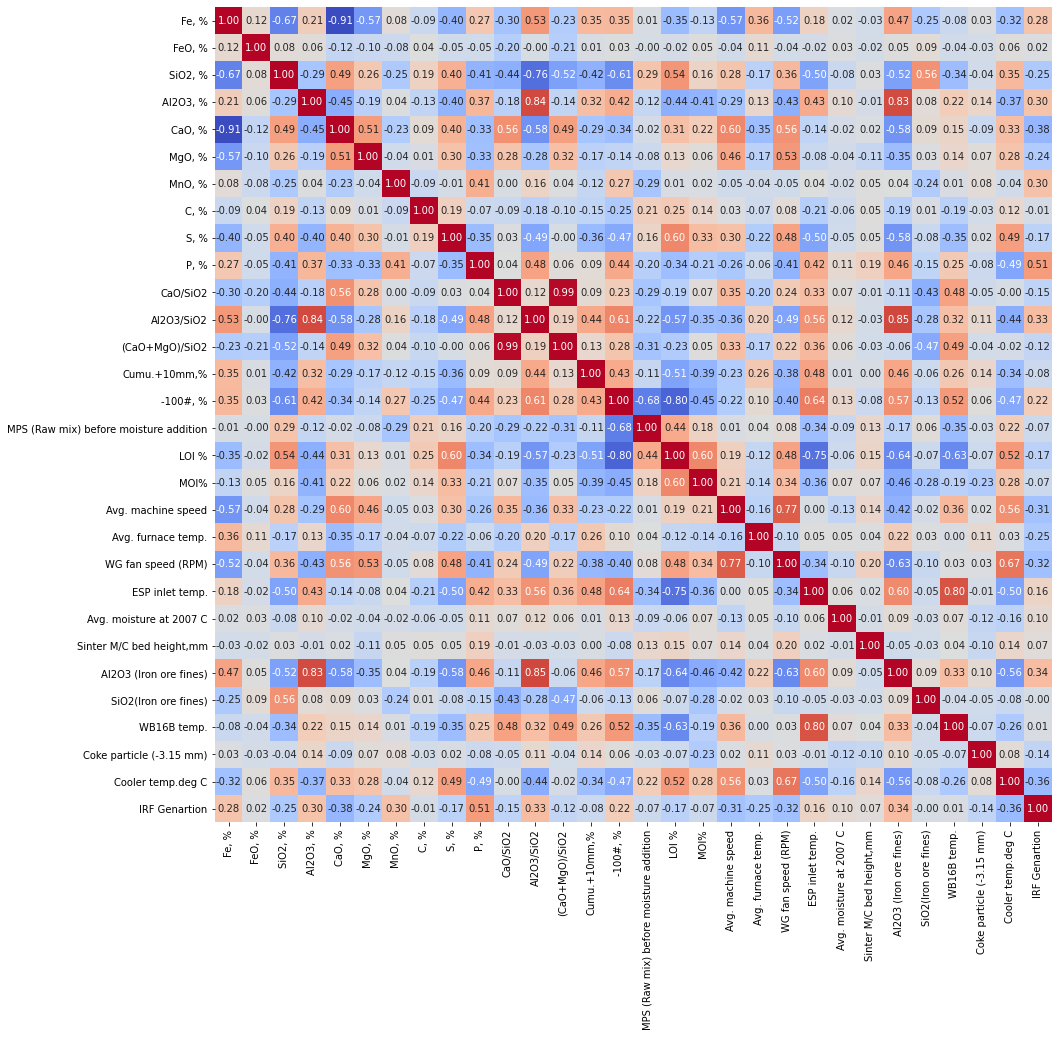

In [11]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(method='pearson'), annot=True, fmt='.2f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)

# Removing Features with very low correlation

In [12]:
df.drop(['FeO, %','C, %','SiO2(Iron ore fines)','SiO2(Iron ore fines)', 'WB16B temp.','MPS (Raw mix) before moisture addition','Cumu.+10mm,%','MOI%'],axis=1,inplace=True)

In [13]:
df.columns

Index(['Fe, %', 'SiO2, %', 'Al2O3, %', 'CaO, %', 'MgO, %', 'MnO, %', 'S, %',
       'P, %', 'CaO/SiO2', 'Al2O3/SiO2', '(CaO+MgO)/SiO2', '-100#, %', 'LOI %',
       'Avg. machine speed', 'Avg. furnace temp.', 'WG fan speed (RPM)',
       'ESP inlet temp.', 'Avg. moisture at 2007 C',
       'Sinter M/C bed height,mm', 'Al2O3 (Iron ore fines)',
       'Coke particle (-3.15 mm)', 'Cooler temp.deg C', 'IRF Genartion'],
      dtype='object')

In [14]:
X=df.drop(['IRF Genartion'],axis=1)

y=df[['IRF Genartion']]

In [15]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit_transform(X)

In [16]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=5)

# Checking with different Algorithms

In [17]:
from  sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from xgboost import XGBRegressor

In [18]:
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(random_state=2),
    "K-nn": KNeighborsRegressor(),                          # Accept default parameters
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(random_state=2),
    "RandomForestRegressor": RandomForestRegressor( random_state=2),
    "Decision Tree Regressor":DecisionTreeRegressor(random_state=2),
    "MultiO/P GBR" :GradientBoostingRegressor(random_state=2),
    "MultiO/P AdaB" :AdaBoostRegressor(random_state=2),
    "xgbr":xgb.XGBRegressor(objective='reg:squarederror',random_state=2)
    
}

In [19]:
y_test_predict = dict()
y_mse = dict()
score_test=dict()
score_train=dict()

for name,estimator in ESTIMATORS.items():     
    estimator.fit(X_train, y_train)                    # fit() with instantiated object
    y_test_predict[name] = estimator.predict(X_test)   # Make predictions and save it in dict under key: name
    
    score_test[name]=estimator.score(X_test,y_test)
    score_train[name]=estimator.score(X_train,y_train)

In [20]:
score_test

{'Extra trees': 0.7689914416859928,
 'K-nn': 0.6017466908343911,
 'Linear regression': 0.46091078825331655,
 'Ridge': 0.45562505466549796,
 'Lasso': 0.2003946716070305,
 'ElasticNet': 0.21041653235150326,
 'RandomForestRegressor': 0.7315961440346993,
 'Decision Tree Regressor': 0.45700361478813234,
 'MultiO/P GBR': 0.677129470323936,
 'MultiO/P AdaB': 0.6041268528279486,
 'xgbr': 0.6715153183927394}

In [21]:
score_train

{'Extra trees': 1.0,
 'K-nn': 0.7261250590479639,
 'Linear regression': 0.48401122517704953,
 'Ridge': 0.4690705228436637,
 'Lasso': 0.23360676635080346,
 'ElasticNet': 0.23844748355684164,
 'RandomForestRegressor': 0.9580536395531206,
 'Decision Tree Regressor': 1.0,
 'MultiO/P GBR': 0.8054424363492794,
 'MultiO/P AdaB': 0.6428047028623743,
 'xgbr': 0.9989722871105341}

#### Since ExtraTrees shows better results, lets first build the model using this algorithms

In [22]:
log=[]
for i in range(0,40,1):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = True, random_state = i)
    reg = ExtraTreesRegressor()
    reg.fit(X_train,y_train)
    pred_TI = reg.predict(X_test)
    rr = r2_score(y_test, pred_TI)
    print(rr, i)
    log.append(rr)
#extr=ExtraTreesRegressor(n_estimators=70,min_samples_leaf=3,random_state=0).fit(X_train,y_train)
#n_estimators=40,max_depth=20,min_samples_split=2,min_samples_leaf=3,max_leaf_nodes=200,

0.7645038581002845 0
0.8070106011356972 1
0.6841333560445171 2
0.7293948030758035 3
0.7264518614614999 4
0.7628880351330972 5
0.7570387257822725 6
0.6773752329302416 7
0.6859057995469366 8
0.7755853198309355 9
0.7234428471246778 10
0.6974352227413116 11
0.7160997042598495 12
0.5782666726446584 13
0.7429569805024112 14
0.7417698788300129 15
0.7101461885272846 16
0.71998674436358 17
0.6488275804123691 18
0.7644762343104626 19
0.8059839783686146 20
0.7789154473085976 21
0.7801025427970958 22
0.7655194663869657 23
0.7504377830420569 24
0.7300875736597516 25
0.7558592233647207 26
0.7038798209987378 27
0.7519727417955202 28
0.735377868819943 29
0.7376878150125683 30
0.645935965347338 31
0.768527531066096 32
0.7607013708254562 33
0.6884490540353294 34
0.7915816085180217 35
0.6862394130607181 36
0.628889495021662 37
0.7367893365986926 38
0.6792432271224528 39


In [23]:
sum(log)/len(log)

0.727396922747706

In [24]:

X_train, X_test, y_train, y_test = train_test_split(X, y,shuffle = True, test_size = 0.1,  random_state = 1)


In [25]:
etr = ExtraTreesRegressor()
etr.fit(X_train,y_train)

ExtraTreesRegressor()

In [26]:
etr.score(X_train,y_train)

1.0

In [27]:
etr.score(X_test,y_test)

0.8055154743718222

In [28]:
y_pred=etr.predict(X_test)


In [29]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.7797006980985897

### Checking Feature Importances to acheive dimensionality reduction so as to reduce model complexity

In [30]:
import shap
shap_values = shap.TreeExplainer(etr).shap_values(X_train)

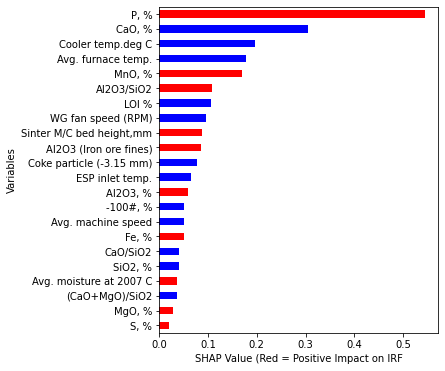

In [31]:

def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variables','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variables','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variables',right_on='Variables',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variables',y='SHAP_abs',color = colorlist,figsize=(5,6), legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact on IRF")
    
ABS_SHAP(shap_values,X_train) 

In [32]:
# model = ExtraTreesRegressor(n_estimators=100,max_depth=15,min_samples_split=4,min_samples_leaf=3,max_leaf_nodes=110)
# model.fit(X_train,y_train)

In [33]:
import time
import numpy as np

start_time = time.time()
importances = etr.feature_importances_
std = np.std([tree.feature_importances_ for tree in etr.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.050 seconds


In [34]:
importances

array([0.02275596, 0.02211497, 0.02490343, 0.09118251, 0.02157201,
       0.08645565, 0.01184688, 0.17072724, 0.02091299, 0.03724372,
       0.01980471, 0.02889304, 0.04673778, 0.03099531, 0.06866399,
       0.05411914, 0.03482703, 0.02483217, 0.04722952, 0.03676474,
       0.02970085, 0.06771636])

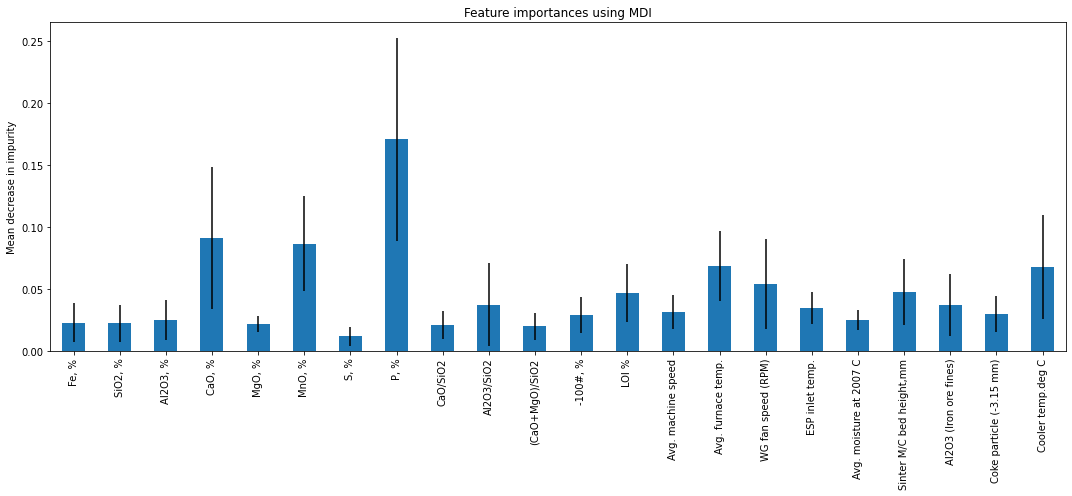

In [35]:
feature_names=X_train.columns
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(15,7))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Elapsed time to compute the importances: 31.211 seconds


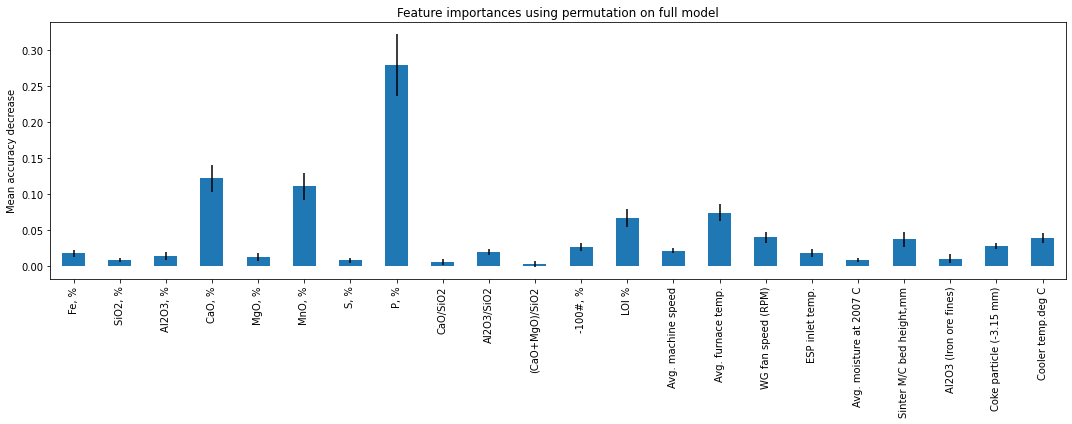

In [36]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    etr, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

fig, ax = plt.subplots(figsize=(15,6))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()


In [37]:
log=[]
for i in range(0,40,1):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = True, random_state = i)
    reg = ExtraTreesRegressor()
    reg.fit(X_train,y_train)
    pred_TI = reg.predict(X_test)
    rr = r2_score(y_test, pred_TI)
    print(rr, i)
    log.append(rr)

0.7745959557014039 0
0.8090313308119231 1
0.6862374037228367 2
0.7309748197898154 3
0.7080816715003632 4
0.758776220814452 5
0.768498277119144 6
0.6732696806819386 7
0.7047036736810319 8
0.7718300953667003 9
0.7267724673844254 10
0.7140503965504829 11
0.7225195712166421 12
0.5789717167102086 13
0.7534249728299239 14
0.7525912435747346 15
0.7097010819723737 16
0.7276856156564847 17
0.6450429582406982 18
0.7846891357382592 19
0.8014933819892536 20
0.775838053329206 21
0.805285645633363 22
0.7737523398105741 23
0.7450868947830164 24
0.7435539869076028 25
0.7639708729946427 26
0.7138270955373017 27
0.7470443708776404 28
0.7303533825425956 29
0.7480336017651487 30
0.644644182916889 31
0.767569197097861 32
0.7544827999674498 33
0.6859143676359567 34
0.8010190764230667 35
0.6972385144581486 36
0.6523891638414112 37
0.7474313711907763 38
0.671674308054371 39


In [38]:
sum(log)/len(log)

0.7318012724205029

In [39]:
# Based on the feature importance plots, we can remove S%, CaO/SiO2,'caO+MgO/SiO2', #100#
X=df.drop(['S, %','(CaO+MgO)/SiO2','-100#, %','CaO/SiO2','IRF Genartion'],axis=1)
y=df[['IRF Genartion']]
X_train,X_test,y_train,y_test=train_test_split(X,y,shuffle=True,test_size=0.1,random_state=1)


# ExtraTrees

In [40]:
model=ExtraTreesRegressor()
model.fit(X_train,y_train)

ExtraTreesRegressor()

In [41]:
model.score(X_test,y_test)

0.8217965071184403

In [42]:
model.score(X_train,y_train)

1.0

# RandomForest

In [43]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [44]:
rf.score(X_test,y_test)

0.7617195329398027

In [45]:
rf.score(X_train,y_train)

0.9561718409237601

# Gradient Boosting

In [46]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [47]:
gbr.score(X_test,y_test)

0.7079590905063462

In [48]:
gbr.score(X_train,y_train)

0.7987826961951516

# Catboost Regressor

In [49]:
import catboost as cb
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)
model_cbr = cb.CatBoostRegressor(loss_function='RMSE')
model_cbr.fit(train_dataset)

Learning rate set to 0.040721
0:	learn: 1.9434296	total: 524ms	remaining: 8m 43s
1:	learn: 1.9097554	total: 537ms	remaining: 4m 27s
2:	learn: 1.8737008	total: 549ms	remaining: 3m 2s
3:	learn: 1.8427479	total: 561ms	remaining: 2m 19s
4:	learn: 1.8110241	total: 579ms	remaining: 1m 55s
5:	learn: 1.7858441	total: 603ms	remaining: 1m 39s
6:	learn: 1.7614000	total: 612ms	remaining: 1m 26s
7:	learn: 1.7346150	total: 631ms	remaining: 1m 18s
8:	learn: 1.7100953	total: 649ms	remaining: 1m 11s
9:	learn: 1.6862765	total: 681ms	remaining: 1m 7s
10:	learn: 1.6631639	total: 750ms	remaining: 1m 7s
11:	learn: 1.6432267	total: 784ms	remaining: 1m 4s
12:	learn: 1.6240865	total: 828ms	remaining: 1m 2s
13:	learn: 1.6027206	total: 921ms	remaining: 1m 4s
14:	learn: 1.5836947	total: 937ms	remaining: 1m 1s
15:	learn: 1.5645009	total: 964ms	remaining: 59.3s
16:	learn: 1.5440019	total: 978ms	remaining: 56.5s
17:	learn: 1.5294117	total: 992ms	remaining: 54.1s
18:	learn: 1.5123411	total: 1s	remaining: 51.8s
19:	le

172:	learn: 0.9119487	total: 3.31s	remaining: 15.8s
173:	learn: 0.9111083	total: 3.35s	remaining: 15.9s
174:	learn: 0.9089981	total: 3.36s	remaining: 15.8s
175:	learn: 0.9066712	total: 3.39s	remaining: 15.9s
176:	learn: 0.9055528	total: 3.4s	remaining: 15.8s
177:	learn: 0.9031772	total: 3.41s	remaining: 15.7s
178:	learn: 0.9007240	total: 3.42s	remaining: 15.7s
179:	learn: 0.8992347	total: 3.44s	remaining: 15.7s
180:	learn: 0.8976317	total: 3.45s	remaining: 15.6s
181:	learn: 0.8957563	total: 3.46s	remaining: 15.5s
182:	learn: 0.8942936	total: 3.47s	remaining: 15.5s
183:	learn: 0.8930375	total: 3.49s	remaining: 15.5s
184:	learn: 0.8916918	total: 3.5s	remaining: 15.4s
185:	learn: 0.8907564	total: 3.5s	remaining: 15.3s
186:	learn: 0.8897765	total: 3.51s	remaining: 15.3s
187:	learn: 0.8880039	total: 3.52s	remaining: 15.2s
188:	learn: 0.8866713	total: 3.53s	remaining: 15.1s
189:	learn: 0.8860924	total: 3.54s	remaining: 15.1s
190:	learn: 0.8854645	total: 3.55s	remaining: 15s
191:	learn: 0.883

332:	learn: 0.7133074	total: 6.83s	remaining: 13.7s
333:	learn: 0.7120725	total: 6.86s	remaining: 13.7s
334:	learn: 0.7111964	total: 6.91s	remaining: 13.7s
335:	learn: 0.7099894	total: 6.94s	remaining: 13.7s
336:	learn: 0.7095298	total: 6.97s	remaining: 13.7s
337:	learn: 0.7086142	total: 7s	remaining: 13.7s
338:	learn: 0.7075396	total: 7.02s	remaining: 13.7s
339:	learn: 0.7058070	total: 7.04s	remaining: 13.7s
340:	learn: 0.7049045	total: 7.07s	remaining: 13.7s
341:	learn: 0.7035730	total: 7.09s	remaining: 13.6s
342:	learn: 0.7028403	total: 7.11s	remaining: 13.6s
343:	learn: 0.7027296	total: 7.13s	remaining: 13.6s
344:	learn: 0.7026740	total: 7.17s	remaining: 13.6s
345:	learn: 0.7018547	total: 7.19s	remaining: 13.6s
346:	learn: 0.7011086	total: 7.21s	remaining: 13.6s
347:	learn: 0.6998383	total: 7.24s	remaining: 13.6s
348:	learn: 0.6986597	total: 7.29s	remaining: 13.6s
349:	learn: 0.6978594	total: 7.32s	remaining: 13.6s
350:	learn: 0.6973463	total: 7.37s	remaining: 13.6s
351:	learn: 0.6

493:	learn: 0.5974330	total: 12.1s	remaining: 12.4s
494:	learn: 0.5967263	total: 12.1s	remaining: 12.4s
495:	learn: 0.5959190	total: 12.1s	remaining: 12.3s
496:	learn: 0.5954131	total: 12.1s	remaining: 12.3s
497:	learn: 0.5945152	total: 12.2s	remaining: 12.3s
498:	learn: 0.5936012	total: 12.2s	remaining: 12.2s
499:	learn: 0.5928880	total: 12.2s	remaining: 12.2s
500:	learn: 0.5926128	total: 12.2s	remaining: 12.2s
501:	learn: 0.5920710	total: 12.2s	remaining: 12.1s
502:	learn: 0.5912214	total: 12.2s	remaining: 12.1s
503:	learn: 0.5904603	total: 12.3s	remaining: 12.1s
504:	learn: 0.5902503	total: 12.3s	remaining: 12s
505:	learn: 0.5889786	total: 12.3s	remaining: 12s
506:	learn: 0.5883665	total: 12.3s	remaining: 12s
507:	learn: 0.5878735	total: 12.3s	remaining: 12s
508:	learn: 0.5877148	total: 12.4s	remaining: 11.9s
509:	learn: 0.5872132	total: 12.4s	remaining: 11.9s
510:	learn: 0.5862176	total: 12.4s	remaining: 11.9s
511:	learn: 0.5853133	total: 12.4s	remaining: 11.9s
512:	learn: 0.584202

653:	learn: 0.4992319	total: 16.4s	remaining: 8.69s
654:	learn: 0.4989402	total: 16.5s	remaining: 8.68s
655:	learn: 0.4988430	total: 16.5s	remaining: 8.65s
656:	learn: 0.4981537	total: 16.5s	remaining: 8.63s
657:	learn: 0.4976457	total: 16.5s	remaining: 8.6s
658:	learn: 0.4968862	total: 16.6s	remaining: 8.58s
659:	learn: 0.4963144	total: 16.6s	remaining: 8.55s
660:	learn: 0.4957025	total: 16.6s	remaining: 8.53s
661:	learn: 0.4949748	total: 16.6s	remaining: 8.5s
662:	learn: 0.4943450	total: 16.7s	remaining: 8.47s
663:	learn: 0.4940603	total: 16.7s	remaining: 8.45s
664:	learn: 0.4936954	total: 16.7s	remaining: 8.42s
665:	learn: 0.4934577	total: 16.7s	remaining: 8.39s
666:	learn: 0.4923785	total: 16.8s	remaining: 8.37s
667:	learn: 0.4916067	total: 16.8s	remaining: 8.34s
668:	learn: 0.4913251	total: 16.8s	remaining: 8.31s
669:	learn: 0.4910419	total: 16.8s	remaining: 8.29s
670:	learn: 0.4903946	total: 16.9s	remaining: 8.26s
671:	learn: 0.4899006	total: 16.9s	remaining: 8.23s
672:	learn: 0.

813:	learn: 0.4188493	total: 21.5s	remaining: 4.92s
814:	learn: 0.4182183	total: 21.6s	remaining: 4.89s
815:	learn: 0.4179320	total: 21.6s	remaining: 4.87s
816:	learn: 0.4174710	total: 21.6s	remaining: 4.84s
817:	learn: 0.4169028	total: 21.6s	remaining: 4.81s
818:	learn: 0.4166146	total: 21.6s	remaining: 4.78s
819:	learn: 0.4162064	total: 21.6s	remaining: 4.75s
820:	learn: 0.4158157	total: 21.7s	remaining: 4.73s
821:	learn: 0.4152753	total: 21.7s	remaining: 4.7s
822:	learn: 0.4149362	total: 21.7s	remaining: 4.67s
823:	learn: 0.4146530	total: 21.7s	remaining: 4.64s
824:	learn: 0.4146177	total: 21.8s	remaining: 4.62s
825:	learn: 0.4143037	total: 21.8s	remaining: 4.59s
826:	learn: 0.4139185	total: 21.8s	remaining: 4.56s
827:	learn: 0.4137465	total: 21.8s	remaining: 4.54s
828:	learn: 0.4132338	total: 21.9s	remaining: 4.51s
829:	learn: 0.4127764	total: 21.9s	remaining: 4.48s
830:	learn: 0.4127555	total: 21.9s	remaining: 4.46s
831:	learn: 0.4121882	total: 22s	remaining: 4.44s
832:	learn: 0.4

977:	learn: 0.3616493	total: 25.3s	remaining: 570ms
978:	learn: 0.3613090	total: 25.4s	remaining: 544ms
979:	learn: 0.3612273	total: 25.4s	remaining: 518ms
980:	learn: 0.3609931	total: 25.4s	remaining: 492ms
981:	learn: 0.3607615	total: 25.4s	remaining: 466ms
982:	learn: 0.3604843	total: 25.4s	remaining: 440ms
983:	learn: 0.3600153	total: 25.5s	remaining: 414ms
984:	learn: 0.3594660	total: 25.5s	remaining: 388ms
985:	learn: 0.3592036	total: 25.5s	remaining: 362ms
986:	learn: 0.3588450	total: 25.5s	remaining: 336ms
987:	learn: 0.3585634	total: 25.5s	remaining: 310ms
988:	learn: 0.3581609	total: 25.5s	remaining: 284ms
989:	learn: 0.3577540	total: 25.6s	remaining: 258ms
990:	learn: 0.3577389	total: 25.6s	remaining: 232ms
991:	learn: 0.3574450	total: 25.6s	remaining: 206ms
992:	learn: 0.3571288	total: 25.6s	remaining: 180ms
993:	learn: 0.3570290	total: 25.6s	remaining: 155ms
994:	learn: 0.3566309	total: 25.6s	remaining: 129ms
995:	learn: 0.3562667	total: 25.6s	remaining: 103ms
996:	learn: 

In [50]:
pred = model_cbr.predict(X_test)

r2 = r2_score(y_test, pred)

In [51]:
r2

0.802356984497736

In [52]:
pred = model_cbr.predict(X_train)

r2_train = r2_score(y_train, pred)
r2_train

0.9678358018445034

# XGboost

In [53]:
xgbr=xgb.XGBRegressor(objective='reg:squarederror',random_state=2)
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=2,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [54]:
xgbr.score(X_test,y_test)

0.662573493478092

In [55]:
xgbr.score(X_train,y_train)

0.9986995445435544

0.694104857112142

0.9068893534127163

1.1035897324381505

0.9643830336578781

1.1416106711027207

In [128]:
X_train.columns

Index(['Fe, %', 'SiO2, %', 'Al2O3, %', 'CaO, %', 'MgO, %', 'MnO, %', 'P, %',
       'Al2O3/SiO2', 'LOI %', 'Avg. machine speed', 'Avg. furnace temp.',
       'WG fan speed (RPM)', 'ESP inlet temp.', 'Avg. moisture at 2007 C',
       'Sinter M/C bed height,mm', 'Al2O3 (Iron ore fines)',
       'Coke particle (-3.15 mm)', 'Cooler temp.deg C'],
      dtype='object')

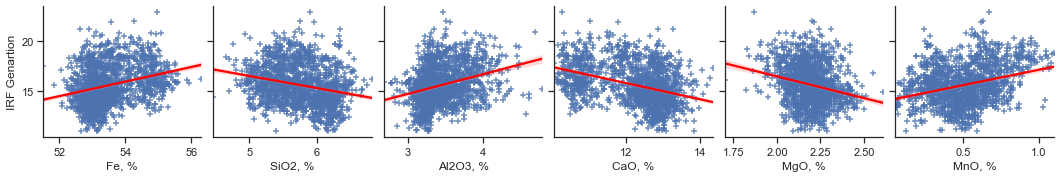

In [161]:
sns.pairplot(df,x_vars=['Fe, %', 'SiO2, %', 'Al2O3, %', 'CaO, %', 'MgO, %', 'MnO, %'],
            y_vars=['IRF Genartion'],kind='reg',plot_kws={'line_kws':{'color':'red'}}, markers='+')


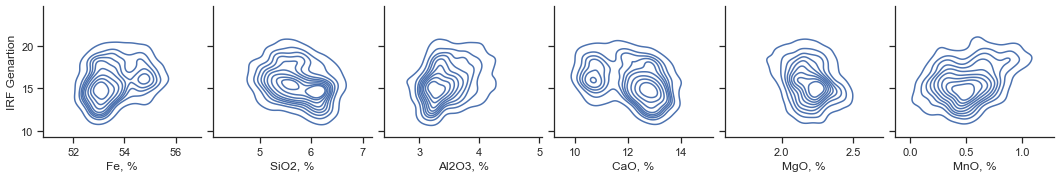

In [162]:
sns.pairplot(df,x_vars=['Fe, %', 'SiO2, %', 'Al2O3, %', 'CaO, %', 'MgO, %', 'MnO, %'],
            y_vars=['IRF Genartion'],kind='kde',plot_kws={'line_kws':{'color':'red'}})


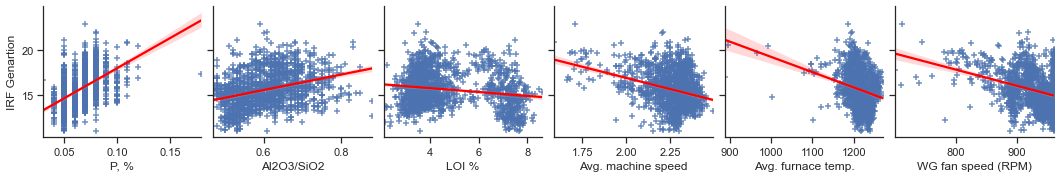

In [163]:
sns.pairplot(df,x_vars=['P, %','Al2O3/SiO2', 'LOI %', 'Avg. machine speed', 'Avg. furnace temp.',
       'WG fan speed (RPM)', ],
            y_vars=['IRF Genartion'],kind='reg',plot_kws={'line_kws':{'color':'red'}}, markers='+')

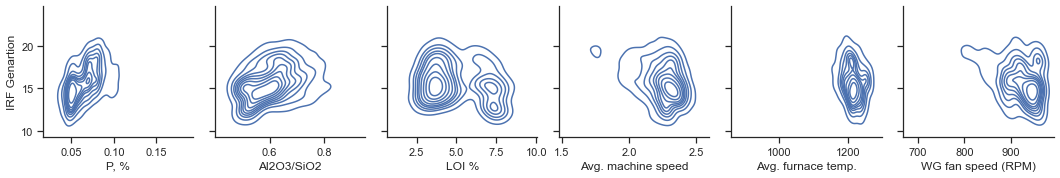

In [165]:
sns.pairplot(df,x_vars=['P, %','Al2O3/SiO2', 'LOI %', 'Avg. machine speed', 'Avg. furnace temp.',
       'WG fan speed (RPM)'],
            y_vars=['IRF Genartion'],kind='kde')

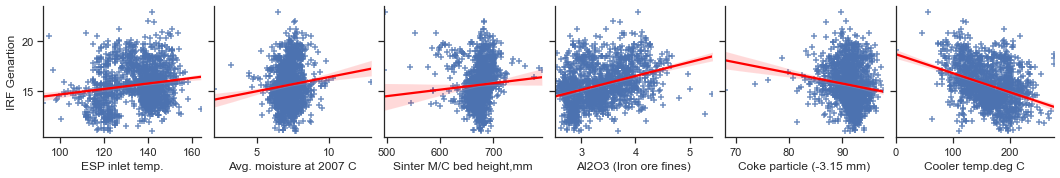

In [167]:
sns.pairplot(df,x_vars=['ESP inlet temp.', 'Avg. moisture at 2007 C',
       'Sinter M/C bed height,mm', 'Al2O3 (Iron ore fines)',
       'Coke particle (-3.15 mm)', 'Cooler temp.deg C'],
            y_vars=['IRF Genartion'],kind='reg',plot_kws={'line_kws':{'color':'red'}},markers="+")

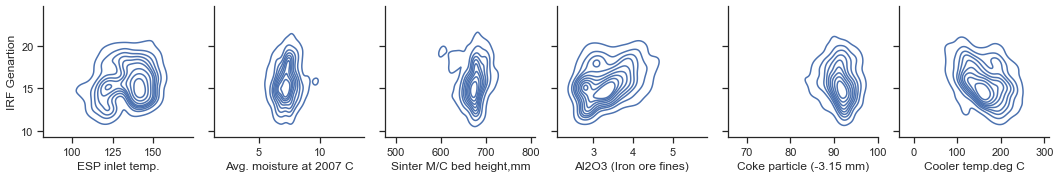

In [168]:
sns.pairplot(df,x_vars=['ESP inlet temp.', 'Avg. moisture at 2007 C',
       'Sinter M/C bed height,mm', 'Al2O3 (Iron ore fines)',
       'Coke particle (-3.15 mm)', 'Cooler temp.deg C'],
            y_vars=['IRF Genartion'],kind='kde')

In [70]:

shap_values_1 = shap.TreeExplainer(model).shap_values(X_train)

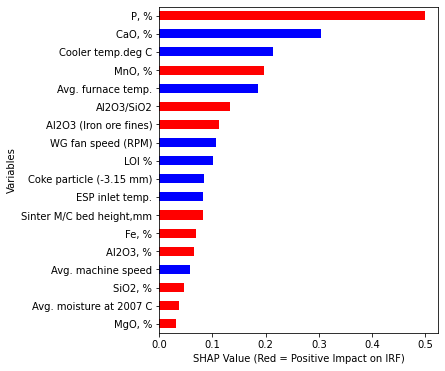

In [71]:
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variables','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variables','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variables',right_on='Variables',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variables',y='SHAP_abs',color = colorlist,figsize=(5,6), legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact on IRF)")
    
ABS_SHAP(shap_values_1,X_train) 

In [72]:
y_et=model.predict(X_test)
y_et=pd.DataFrame(y_et)
y_cat=model_cbr.predict(X_test)
y_cat=pd.DataFrame(y_cat)
y_rf=rf.predict(X_test)
y_rf=pd.DataFrame(y_rf)
y_gbr=gbr.predict(X_test)
y_gbr=pd.DataFrame(y_gbr)
y_xgbr=xgbr.predict(X_test)
y_xgbr=pd.DataFrame(y_xgbr)

In [73]:
mean_squared_error(y_test.iloc[:,0],y_et.iloc[:,0],squared=False)

0.8452390274895901

In [74]:
mean_squared_error(y_test.iloc[:,0],y_rf.iloc[:,0],squared=False)

0.9773849714747954

In [75]:
from scipy import stats
from scipy.stats import linregress
linregress(y_test.iloc[:,0],y_et.iloc[:,0])

LinregressResult(slope=0.7522014580149745, intercept=3.9272611763259118, rvalue=0.9113614832435398, pvalue=7.858866427555978e-56, stderr=0.02871191357436434, intercept_stderr=0.4500900796832297)

Text(0.5, 1.0, 'Testing Data: ETR model')

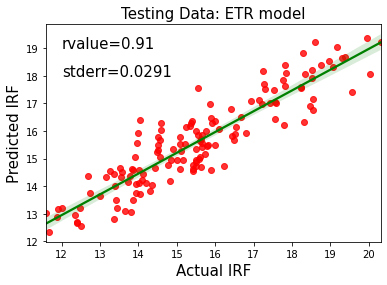

In [76]:
fig,ax=plt.subplots()
YS=sns.regplot(y_test.iloc[:,0],y_et.iloc[:,0],scatter_kws={"color": "red"}, line_kws={"color": "Green"})
YS.set_xlabel("Actual IRF", fontsize = 15)
YS.set_ylabel("Predicted IRF", fontsize = 15)
ax.text(12,19, "rvalue=0.91", fontsize=15)
ax.text(12,18, "stderr=0.0291", fontsize=15)
#plt.legend(labels=['y=0.91079*x + 38.6608'],fontsize = 10)
plt.title('Testing Data: ETR model',fontsize=15)

In [77]:
linregress(y_test.iloc[:,0],y_rf.iloc[:,0])

LinregressResult(slope=0.7355621268091316, intercept=4.254237347145095, rvalue=0.8764675100131427, pvalue=2.7733438377211252e-46, stderr=0.03414920852968397, intercept_stderr=0.5353255173478967)

Text(0.5, 1.0, 'Testing Data: RF model')

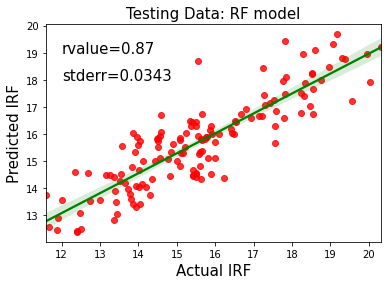

In [78]:
fig,ax=plt.subplots()
YS=sns.regplot(y_test.iloc[:,0],y_rf.iloc[:,0],scatter_kws={"color": "red"}, line_kws={"color": "Green"})
YS.set_xlabel("Actual IRF", fontsize = 15)
YS.set_ylabel("Predicted IRF", fontsize = 15)
ax.text(12,19, "rvalue=0.87", fontsize=15)
ax.text(12,18, "stderr=0.0343", fontsize=15)
#plt.legend(labels=['y=0.91079*x + 38.6608'],fontsize = 10)
plt.title('Testing Data: RF model',fontsize=15)

In [79]:
linregress(y_test.iloc[:,0],y_cat.iloc[:,0])

LinregressResult(slope=0.7831492628450549, intercept=3.49998408634627, rvalue=0.8984370022905196, pvalue=6.809330414788205e-52, stderr=0.03234884254371749, intercept_stderr=0.5071028470621329)

Text(0.5, 1.0, 'Testing Data: CBR model')

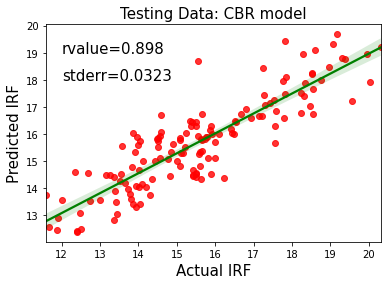

In [80]:
fig,ax=plt.subplots()
YS=sns.regplot(y_test.iloc[:,0],y_rf.iloc[:,0],scatter_kws={"color": "red"}, line_kws={"color": "Green"})
YS.set_xlabel("Actual IRF", fontsize = 15)
YS.set_ylabel("Predicted IRF", fontsize = 15)
ax.text(12,19, "rvalue=0.898", fontsize=15)
ax.text(12,18, "stderr=0.0323", fontsize=15)
#plt.legend(labels=['y=0.91079*x + 38.6608'],fontsize = 10)
plt.title('Testing Data: CBR model',fontsize=15)

In [81]:
linregress(y_test.iloc[:,0],y_gbr.iloc[:,0])

LinregressResult(slope=0.6614788275303226, intercept=5.369701778180943, rvalue=0.8454342508350021, pvalue=5.816172464910246e-40, stderr=0.0353165288679287, intercept_stderr=0.5536245172628843)

Text(0.5, 1.0, 'Testing Data: Gradient Boosting')

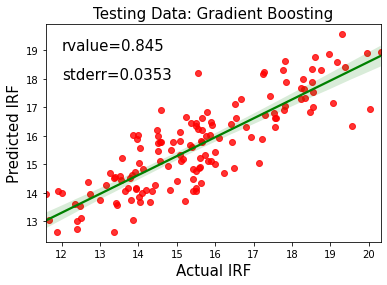

In [82]:
fig,ax=plt.subplots()
YS=sns.regplot(y_test.iloc[:,0],y_gbr.iloc[:,0],scatter_kws={"color": "red"}, line_kws={"color": "Green"})
YS.set_xlabel("Actual IRF", fontsize = 15)
YS.set_ylabel("Predicted IRF", fontsize = 15)
ax.text(12,19, "rvalue=0.845", fontsize=15)
ax.text(12,18, "stderr=0.0353", fontsize=15)
#plt.legend(labels=['y=0.91079*x + 38.6608'],fontsize = 10)
plt.title('Testing Data: Gradient Boosting',fontsize=15)

# MODEL Validation

In [ ]:
irf_val=pd.read_csv("D:/JSW/validation/IR_val.csv")
x_val=irf_val[['Fe, %', 'SiO2, %', 'Al2O3, %', 'CaO, %', 'MgO, %', 'MnO, %', 'P, %',
       'Al2O3/SiO2', 'LOI %', 'Avg. machine speed', 'Avg. furnace temp.',
       'WG fan speed (RPM)', 'ESP inlet temp.', 'Avg. moisture at 2007 C',
       'Sinter M/C bed height,mm', 'Al2O3 (Iron ore fines)',
       'Coke particle (-3.15 mm)', 'Cooler temp.deg C']]
y_val=irf_val[['IRF Genartion']]

In [ ]:
ym=model.predict(x_val)
mean_squared_error(y_val,ym,squared=False)

In [ ]:
yrf=rf.predict(x_val)
mean_squared_error(y_val,yrf,squared=False)


In [ ]:
ygb=gbr.predict(x_val)
mean_squared_error(y_val,ygb,squared=False)


In [ ]:
y_cbr=model_cbr.predict(x_val)
mean_squared_error(y_val,y_cbr,squared=False)


In [ ]:
xygbr=xgbr.predict(x_val)
mean_squared_error(y_val,xygbr,squared=False)

In [183]:
ym=pd.DataFrame(ym)

Text(0.5, 1.0, 'Validation Data: ETR model')

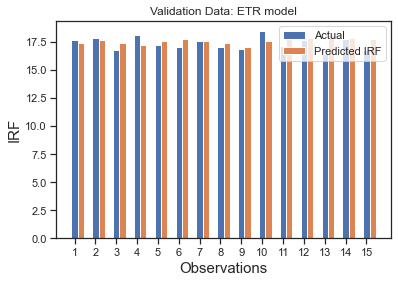

In [184]:
measured=y_val.iloc[:,0]
predicted=ym.iloc[:,0]
x=[y for y in range(1,16,1)]
w=0.3

bar1=np.arange(len(x))
bar2=[i+w for i in bar1]
plt.bar(bar1,measured,w,label='Actual')
plt.bar(bar2,predicted,w,label='Predicted IRF')
plt.legend(loc='upper right')
plt.xticks(bar1,x)
plt.xlabel('Observations',fontsize=15)
plt.ylabel('IRF',fontsize=15)
plt.title('Validation Data: ETR model')

In [97]:
mape_mean=np.mean(np.abs((y_val.iloc[:,0] - ym.iloc[:,0])/y_val.iloc[:,0]))*100
mape=np.abs((y_val.iloc[:,0] - ym.iloc[:,0])/y_val.iloc[:,0])*100
mape=pd.DataFrame(mape)

In [101]:
mape

,0
0,1.811193
1,0.964226
2,3.572619
3,4.821093
4,2.236184
5,3.807490
6,0.014237
7,2.370305
8,1.558526
9,4.708559


In [98]:
mape_mean

3.212330507476747

Text(0.5, 1.0, 'Validation Data: ETR Model')

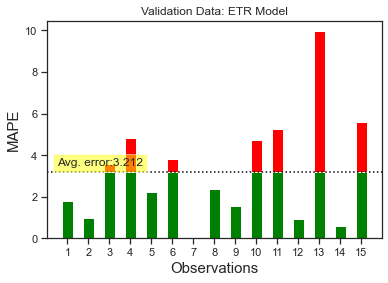

In [185]:
mape_ys=mape.iloc[:,0]

x=[y for y in range(1,16,1)]
w=0.5
threshold=mape_mean
bar1=np.arange(len(x))
a_threshold = np.maximum(mape_ys - threshold, 0)
b_threshold = np.minimum(mape_ys, threshold)

fig, ax = plt.subplots()
ax.bar(x, b_threshold, w, color="green")
ax.bar(x, a_threshold, w, color="red", bottom=b_threshold)

plt.axhline(threshold, color='black', ls='dotted')

ax.text(0.5, 3.5, "Avg. error:3.212", bbox=dict(facecolor='yellow', alpha=0.5))
plt.xticks(x)
plt.xlabel('Observations',fontsize=15)
plt.ylabel('MAPE',fontsize=15)
plt.title('Validation Data: ETR Model')

In [173]:
ym=pd.DataFrame(ym)

In [177]:
ym

,0
0,17.3696
1,17.7175
2,17.4002
3,17.2369
4,17.5744
5,17.7407
6,17.5575
7,17.4439
8,17.0923
9,17.5908


In [178]:
y_val

,IRF Genartion
0,17.69
1,17.89
2,16.80
3,18.11
4,17.19
5,17.09
6,17.56
7,17.04
8,16.83
9,18.46


In [170]:
yrf

array([17.6696, 17.8896, 17.5728, 17.3138, 17.6895, 17.5497, 17.3713,
       17.4137, 17.2461, 17.5684, 17.2407, 17.3343, 18.4166, 17.4419,
       17.4365])

In [171]:
y_cbr

array([17.48433514, 17.84429052, 17.56002233, 17.33859088, 18.19926246,
       17.65482722, 17.39496484, 17.89271452, 16.94077391, 17.17452889,
       17.11281441, 17.48003965, 18.390228  , 17.9228438 , 17.24568664])

Text(0.5, 1.0, 'Testing Data: Gradient Boosting')

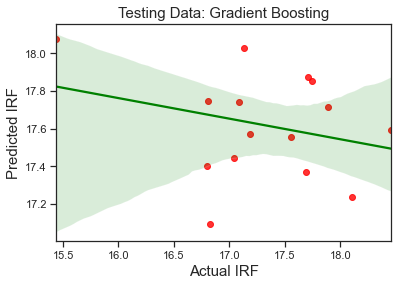

In [176]:
fig,ax=plt.subplots()
YS=sns.regplot(y_val.iloc[:,0],ym.iloc[:,0],scatter_kws={"color": "red"}, line_kws={"color": "Green"})
YS.set_xlabel("Actual IRF", fontsize = 15)
YS.set_ylabel("Predicted IRF", fontsize = 15)
# ax.text(12,17, "rvalue=0.845", fontsize=15)
# ax.text(12,17, "stderr=0.0353", fontsize=15)
#plt.legend(labels=['y=0.91079*x + 38.6608'],fontsize = 10)
plt.title('Testing Data: Gradient Boosting',fontsize=15)